# Задание №3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
%matplotlib inline

## Генерация данных

In [2]:
np.random.seed(42)
data_start = dt.datetime(2024, 7, 3)
data_end = data_start+relativedelta(hours = 999)
data_range = pd.date_range(data_start, data_end, freq = "1H")
coords_data = pd.Series([np.sin(np.pi*i)+30.0+np.random.normal(50.0) for i in range(data_range.shape[0])], index = data_range).to_frame(name = "Целевая переменная")
display(coords_data.head())

,Целевая переменная
2024-07-03 00:00:00,80.496714
2024-07-03 01:00:00,79.861736
2024-07-03 02:00:00,80.647689
2024-07-03 03:00:00,81.523030
2024-07-03 04:00:00,79.765847


## Визуализация данных

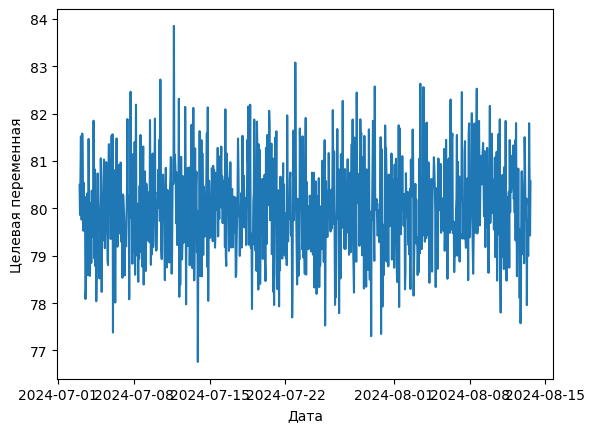

In [3]:
plt.plot(coords_data["Целевая переменная"])
plt.xlabel("Дата")
plt.ylabel("Целевая переменная")
plt.show()

## Разделение данных

In [4]:
y = np.array(coords_data.values.flatten())
X = np.array(data_range)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)

## Построение моделей

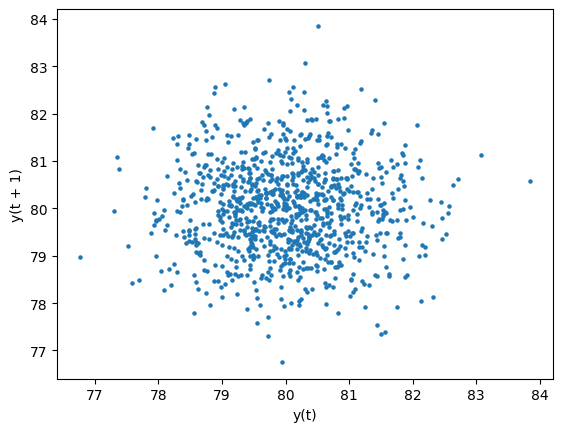

In [5]:
pd.plotting.lag_plot(coords_data, s = 5)
plt.show()

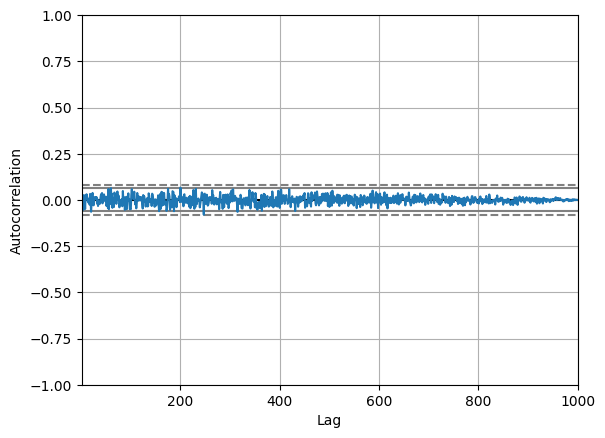

In [6]:
pd.plotting.autocorrelation_plot(coords_data)
plt.show()

### Авторегрессионная модель

Средняя абсолютная ошибка: 0.8276947856169034
Корень среднеквадратической ошибки: 1.0217603230054897


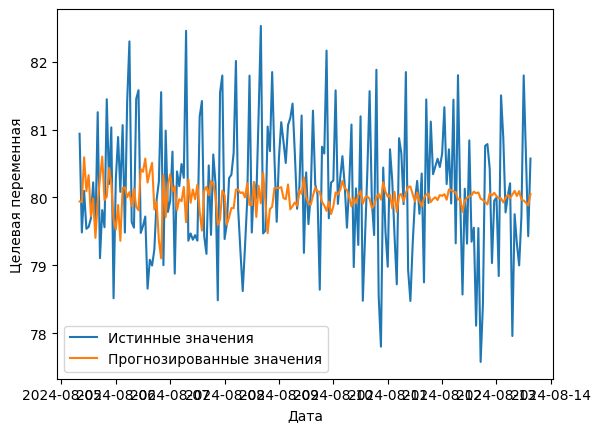

In [7]:
model = AutoReg(y_train, lags = 100).fit()
y_pred = model.predict(start = len(y_train), end = len(y)-1)
MAE_score = mean_absolute_error(y_test, y_pred)
RMSE_score = root_mean_squared_error(y_test, y_pred)
print("Средняя абсолютная ошибка: "+str(MAE_score))
print("Корень среднеквадратической ошибки: "+str(RMSE_score))
plt.plot(X_test, y_test, label = "Истинные значения")
plt.plot(X_test, y_pred, label = "Прогнозированные значения")
plt.xlabel("Дата")
plt.ylabel("Целевая переменная")
plt.legend()
plt.show()

### Экспоненциальное сглаживание

Средняя абсолютная ошибка: 0.7696578947632073
Корень среднеквадратической ошибки: 0.9582955899095977


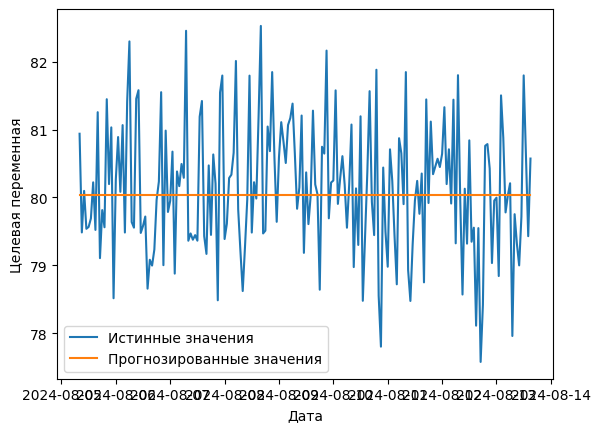

In [8]:
model = SimpleExpSmoothing(y_train).fit()
y_pred = model.predict(start = len(y_train), end = len(y)-1)
MAE_score = mean_absolute_error(y_test, y_pred)
RMSE_score = root_mean_squared_error(y_test, y_pred)
print("Средняя абсолютная ошибка: "+str(MAE_score))
print("Корень среднеквадратической ошибки: "+str(RMSE_score))
plt.plot(X_test, y_test, label = "Истинные значения")
plt.plot(X_test, y_pred, label = "Прогнозированные значения")
plt.xlabel("Дата")
plt.ylabel("Целевая переменная")
plt.legend()
plt.show()